# SUDIPTA GANGULY
# ROLL NO: 2105415

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset of the project

In [7]:
df=pd.read_csv('h1b.csv')

In [8]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


# Data Cleansing

In [9]:
(df.isna()==True).sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

# Analysis of the dataset
# Petition distributed by case statuses

In [10]:
cs=df['CASE_STATUS'].value_counts()
cs

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

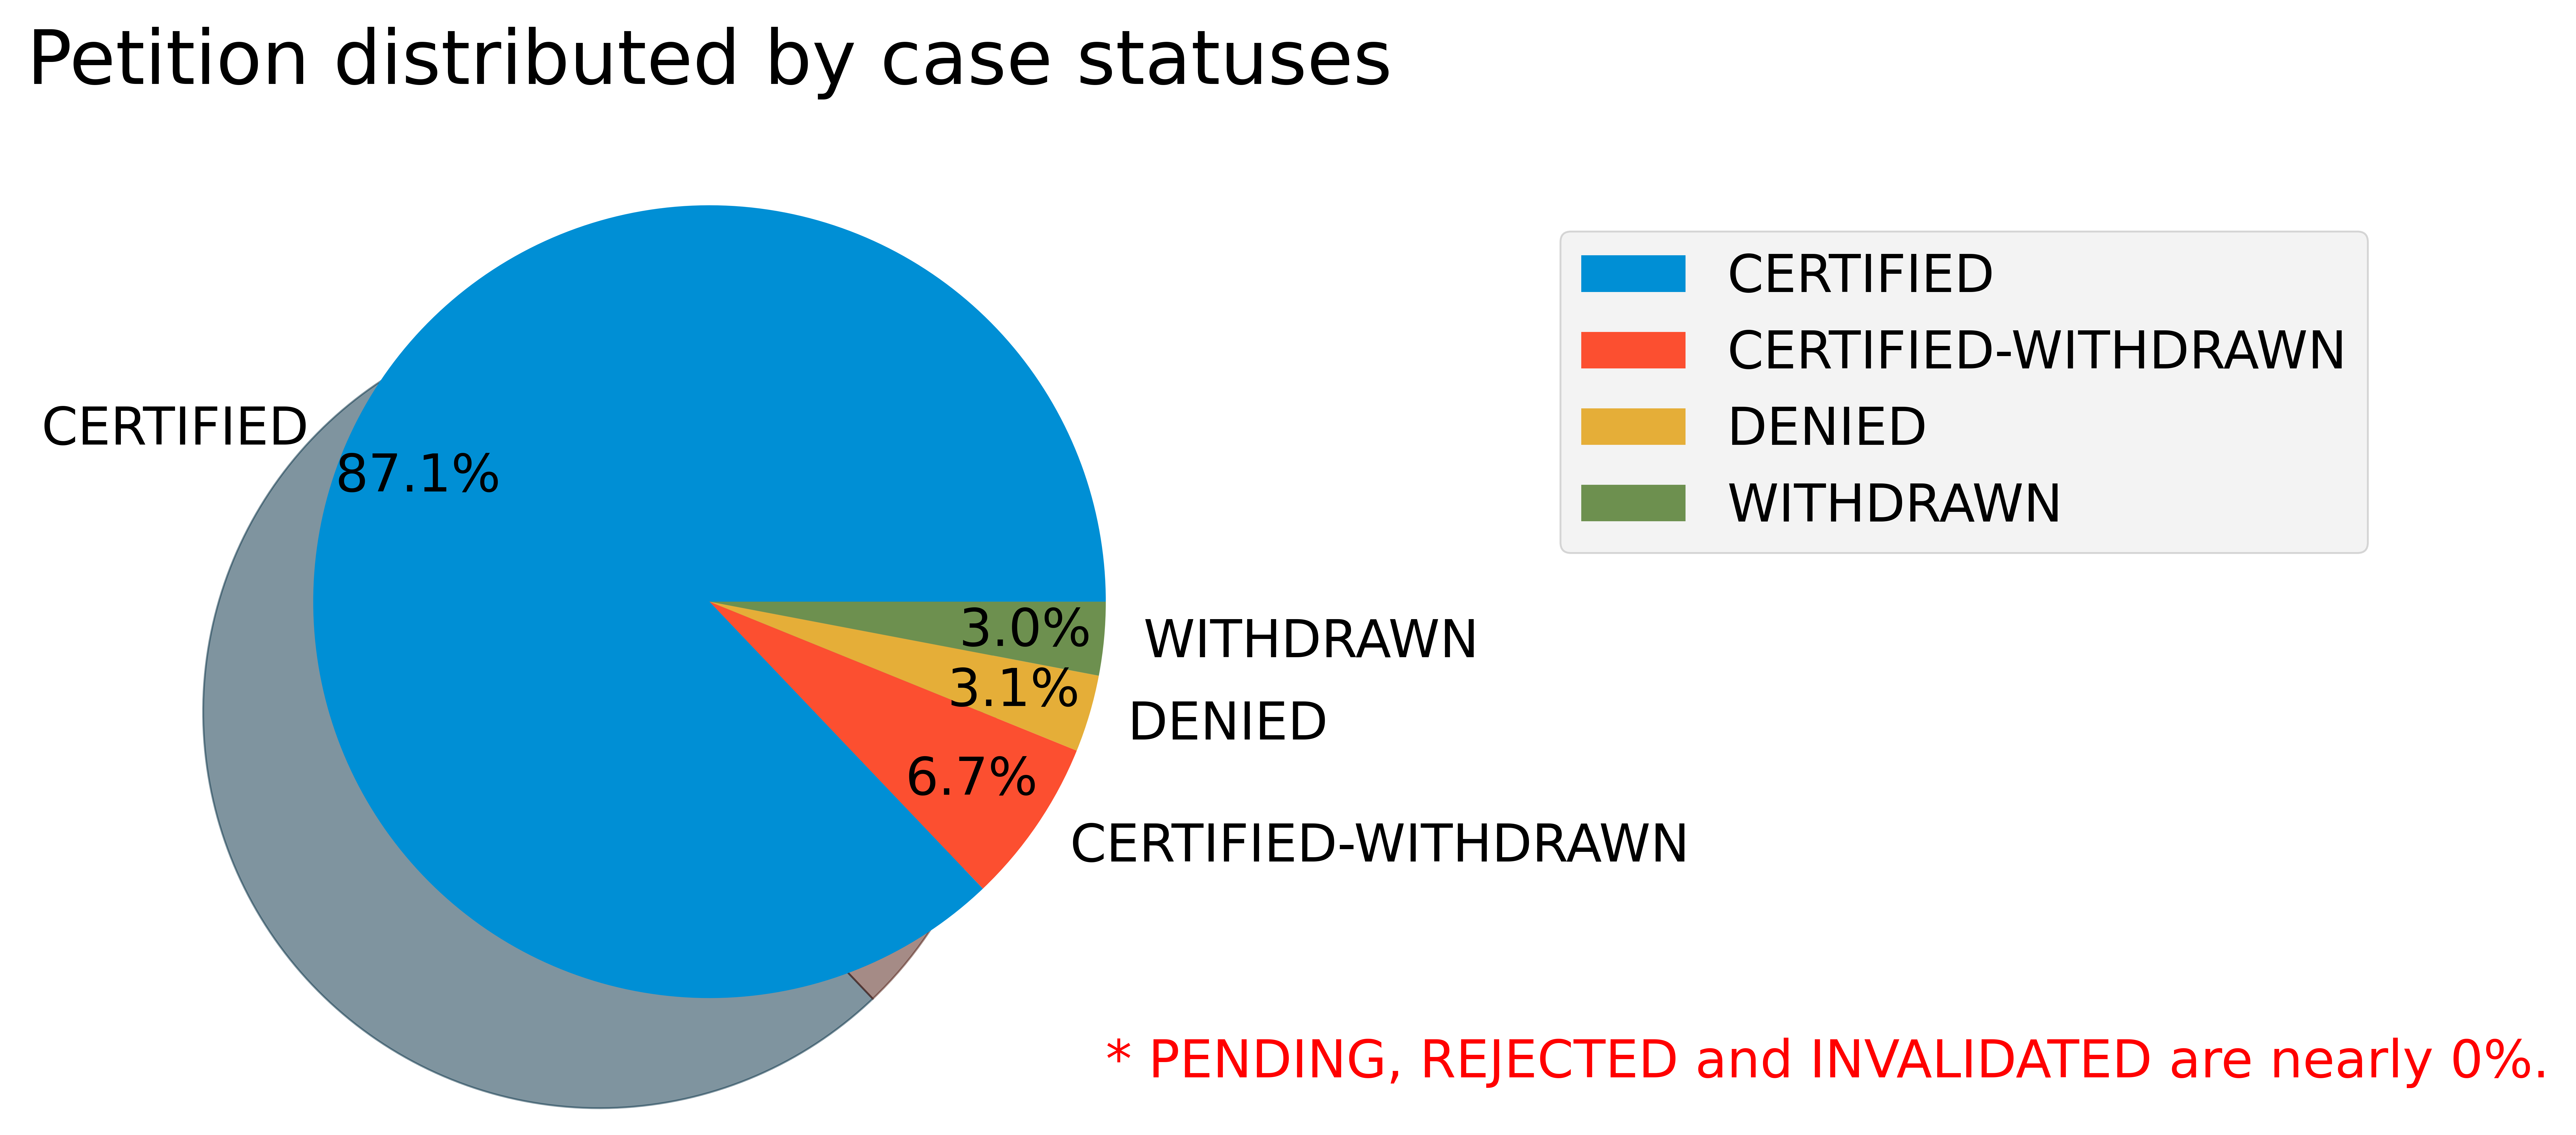

In [11]:
plt.figure(dpi=1000)
plt.style.use('fivethirtyeight')
percent=[v/sum(cs.values)*100 for v in cs.values]
c,_,_=plt.pie(x=percent[:4],labels=cs.index[:4],autopct='%.1f%%',pctdistance=0.8,shadow=True)
plt.title('Petition distributed by case statuses')
plt.legend(c,cs.index,loc='upper right',bbox_to_anchor=(2.2,0.9))
plt.text(1,-1.2,'* PENDING, REJECTED and INVALIDATED are nearly 0%.',color='r')
plt.show()

In [12]:
def operation(l):
    for v in l:
        print(v)

# Top employers filing the petitions


In [13]:
emp=df['EMPLOYER_NAME'].value_counts().head().sort_values(ascending=True)
operation(emp.index.to_list())

IBM INDIA PRIVATE LIMITED
DELOITTE CONSULTING LLP
WIPRO LIMITED
TATA CONSULTANCY SERVICES LIMITED
INFOSYS LIMITED


In [14]:
plt.style.use('fivethirtyeight')
plt.figure(dpi=1000)
ax=sns.barplot(data=emp,y=emp.index,x=emp.values,orient='h',width=0.5)
ax.set(xlabel='No of petitions filed',ylabel=None,yticklabels=emp.index)
ax.set_title('Top Employers filing the petitions',pad=20)
for i,v in enumerate(emp.values):
    ax.text(x=v,y=i,s=str(v))
plt.show()

# Top 15 companies that filed the most visa application

In [15]:
emp3=df['EMPLOYER_NAME'].value_counts().head(15)
operation(emp3.index.to_list())

INFOSYS LIMITED
TATA CONSULTANCY SERVICES LIMITED
WIPRO LIMITED
DELOITTE CONSULTING LLP
IBM INDIA PRIVATE LIMITED
ACCENTURE LLP
MICROSOFT CORPORATION
HCL AMERICA, INC.
ERNST & YOUNG U.S. LLP
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION
LARSEN & TOUBRO INFOTECH LIMITED
CAPGEMINI AMERICA INC
GOOGLE INC.
IBM CORPORATION
IGATE TECHNOLOGIES INC.


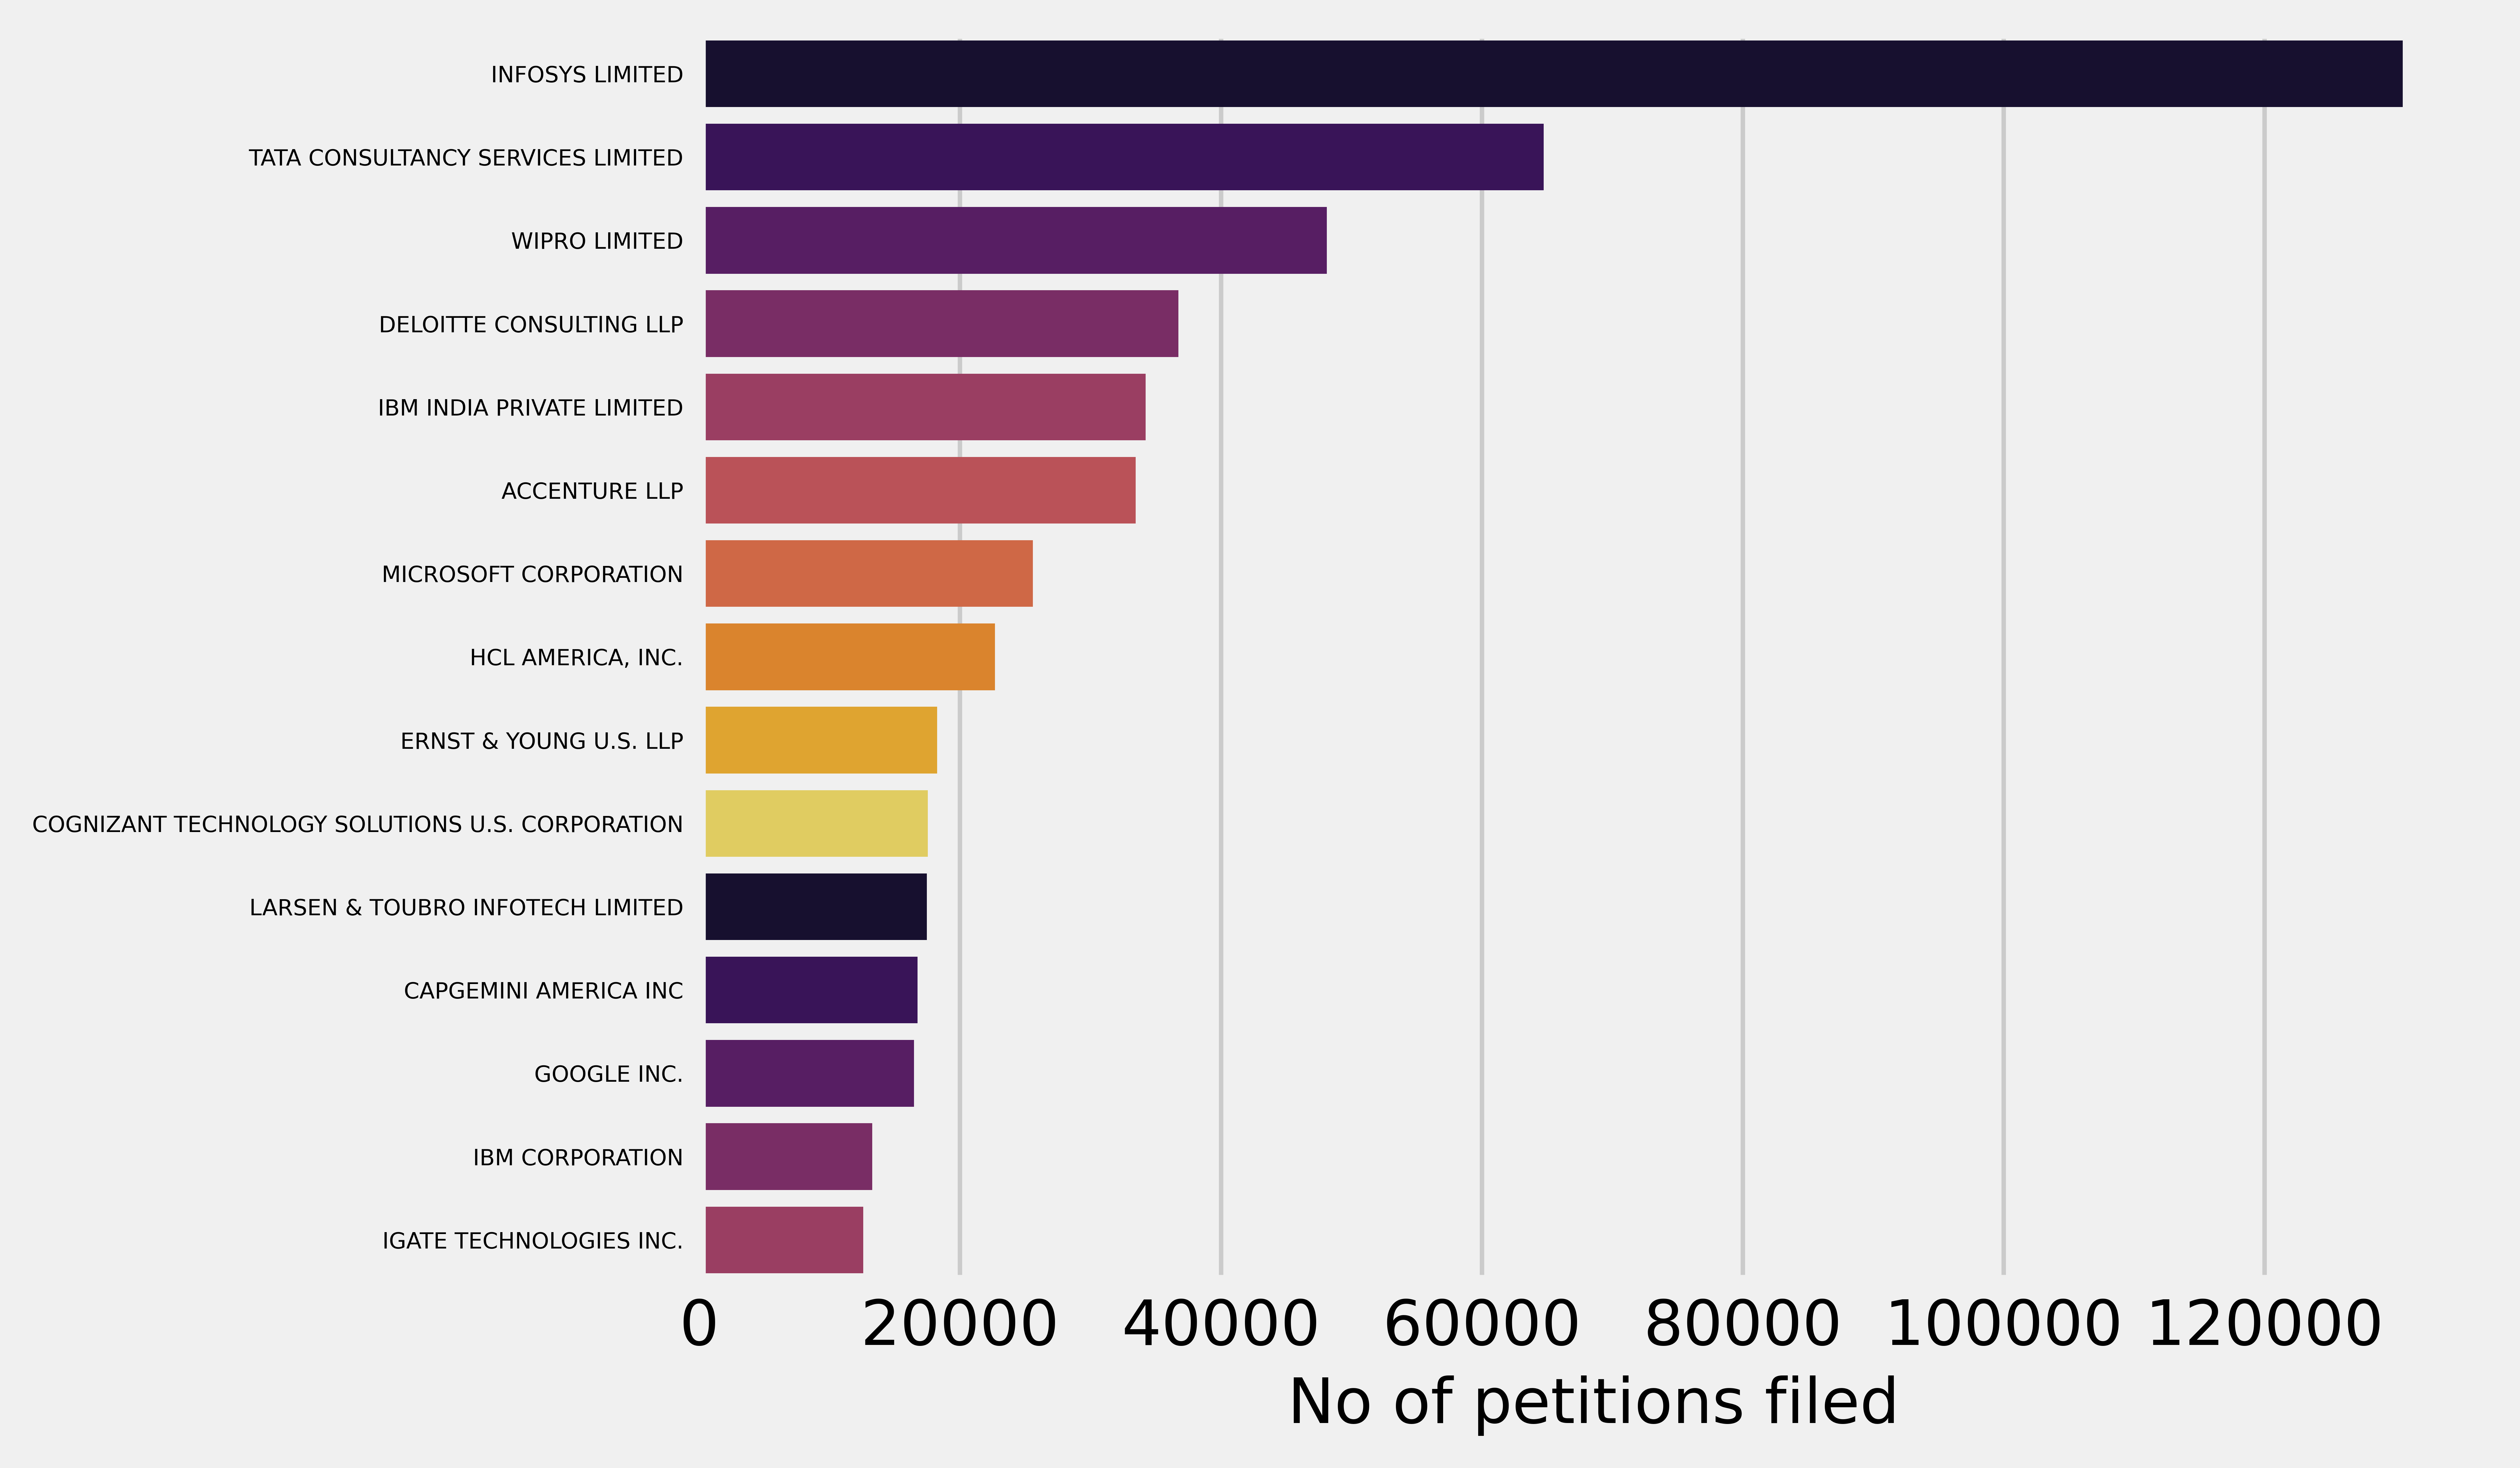

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(dpi=1000)
ax=sns.barplot(data=emp3,x=emp3.values,y=emp3.index,orient='h',order=emp3.values,
               palette=sns.color_palette('inferno',10))
ax.set(xlabel='No of petitions filed',ylabel=None)
ax.set_yticklabels(labels=emp3.index,fontsize=5)
plt.show()

# Top employers granting maximum prevailing wages

In [17]:
emp2=df[df['CASE_STATUS']=='CERTIFIED'].groupby('EMPLOYER_NAME').agg({'PREVAILING_WAGE':'max'}).sort_values('PREVAILING_WAGE',ascending=False).head()
# operation(emp2.index.to_list())
emp2

,PREVAILING_WAGE
EMPLOYER_NAME,
INTEGRATED MEDICAL SERVICES,306049120.0
DEPARTMENT OF VETERANS AFFAIRS/NMVAHCS,269274720.0
SHELBY HOSPITAL LCC,218395840.0
GOOGLE INC.,207277824.0
"SOAPROJECTS, INC",181232480.0


# Top 20 states filing highest visa petitions

In [18]:
states=df['WORKSITE'].apply(lambda v:v[v.index(',')+2:]).value_counts().head(20)
operation(states.index.to_list())

CALIFORNIA
TEXAS
NEW YORK
NEW JERSEY
ILLINOIS
MASSACHUSETTS
PENNSYLVANIA
FLORIDA
GEORGIA
WASHINGTON
VIRGINIA
MICHIGAN
NORTH CAROLINA
OHIO
MARYLAND
CONNECTICUT
MINNESOTA
ARIZONA
MISSOURI
WISCONSIN


# Petition distribution by year

In [ ]:
yearDis=df.groupby('YEAR')['CASE_STATUS'].value_counts().reset_index()
yearis.head()

In [ ]:
plt.figure(dpi=1000)
plt.style.use('fivethirtyeight')
ax=sns.barplot(data=yearDis,x='YEAR',y='count',hue='CASE_STATUS',width=1)
plt.legend(loc='upper right',bbox_to_anchor=(2.2,1))
ax.set(ylabel='No of petitions filed')
ax.set_title('Petition Distribution by Year')

# Number of visa petitions denied

In [21]:
(df['CASE_STATUS']=='DENIED').sum()

94346

# Rate of visas denied from last 5 years

In [22]:
cond=df['YEAR']>df['YEAR'].max()-5
print(f"{(df[cond]['CASE_STATUS']=='DENIED').sum()/cond.sum()*100} %")

2.466866237113597 %


# Number of visa petitions filed by states

In [23]:
l=df['WORKSITE'].apply(lambda v:v[v.index(',')+2:]).value_counts().sort_index()
l

ALABAMA                  10253
ALASKA                    1396
ARIZONA                  42054
ARKANSAS                 14762
CALIFORNIA              559942
COLORADO                 32038
CONNECTICUT              50253
DELAWARE                 18138
DISTRICT OF COLUMBIA     22708
FLORIDA                 105773
GEORGIA                 103168
HAWAII                    3752
IDAHO                     4191
ILLINOIS                160814
INDIANA                  30516
IOWA                     16743
KANSAS                   13782
KENTUCKY                 12702
LOUISIANA                11669
MAINE                     3918
MARYLAND                 56257
MASSACHUSETTS           116466
MICHIGAN                 82964
MINNESOTA                48686
MISSISSIPPI               4270
MISSOURI                 34813
MONTANA                    986
NA                        3604
NEBRASKA                  9256
NEVADA                    7448
NEW HAMPSHIRE             9929
NEW JERSEY              214078
NEW MEXI

# Rate of denial of visa petition by the states

In [24]:
i=-1
def geti():
    global i
    i+=1
    return i
df['temp']=df['WORKSITE'].apply(lambda v:v[v.index(',')+2:])
denialRate=df[df['CASE_STATUS']=='DENIED'].groupby('temp').agg({'CASE_STATUS':'count'})['CASE_STATUS'].apply(lambda v:v/l[geti()]*100)
df.drop('temp',axis=1,inplace=True)
denialRate

temp
ALABAMA                  5.091193
ALASKA                  11.318052
ARIZONA                  2.751225
ARKANSAS                 2.255792
CALIFORNIA               3.168185
COLORADO                 3.567638
CONNECTICUT              2.459555
DELAWARE                 2.023376
DISTRICT OF COLUMBIA     5.205214
FLORIDA                  5.272612
GEORGIA                  2.671371
HAWAII                  10.394456
IDAHO                    4.628967
ILLINOIS                 2.453145
INDIANA                  2.726439
IOWA                     2.610046
KANSAS                   3.156291
KENTUCKY                 3.369548
LOUISIANA                5.304653
MAINE                    3.471159
MARYLAND                 3.741757
MASSACHUSETTS            3.115931
MICHIGAN                 2.699966
MINNESOTA                2.310726
MISSISSIPPI              6.510539
MISSOURI                 2.318100
MONTANA                  8.519270
NA                      20.227525
NEBRASKA                 3.035869
NEVADA   

# Top 25 job titles

In [25]:
jobTitles=df['JOB_TITLE'].value_counts().head(25)
operation(jobTitles.index.to_list())

PROGRAMMER ANALYST
SOFTWARE ENGINEER
COMPUTER PROGRAMMER
SYSTEMS ANALYST
SOFTWARE DEVELOPER
BUSINESS ANALYST
COMPUTER SYSTEMS ANALYST
TECHNOLOGY LEAD - US
SENIOR SOFTWARE ENGINEER
TECHNOLOGY ANALYST - US
ASSISTANT PROFESSOR
SENIOR CONSULTANT
CONSULTANT
PHYSICAL THERAPIST
PROJECT MANAGER
DATABASE ADMINISTRATOR
ACCOUNTANT
COMPUTER PROGRAMMER ANALYST
RESEARCH ASSOCIATE
DEVELOPER
ASSOCIATE
ANALYST
LEAD ENGINEER
COMPUTER SYSTEMS ENGINEER
SENIOR SOFTWARE DEVELOPER


# Top 10 occupations with the highest wages


In [26]:
df.sort_values('PREVAILING_WAGE',ascending=False)[['SOC_NAME','JOB_TITLE']].head(10)

,SOC_NAME,JOB_TITLE
2163248,Physical Therapists,PHYSICAL THERAPISTS
2797982,Computer Programmers,SOFTWARE DEVELOPER
1673867,Statisticians,PROJECT MANAGER
1819718,"Software Developers, Applications",.NET DEVELOPER
2775906,Medical and Health Services Managers,PROGRAM MANAGER (POSITIVE PATHWAYS)
1547574,Computer Systems Analysts,PROGRAMMER/ANALYST
1668384,"Life Scientists, All Other",RESEARCH ASSOCIATE
1805875,Architectural and Engineering Managers,"MANAGER, SOFTWARE ENGINEERING"
2796071,Financial Managers,"MANAGING DIRECTOR, EQUITY DERIVATIVES"
1698325,"Internists, General",INTERNIST


# To analyse the fraction of full-time and part-time workers

In [27]:
(df['FULL_TIME_POSITION']=='Y').sum()/(df['FULL_TIME_POSITION']=='N').sum()

6.04249974198512

In [28]:
(df['FULL_TIME_POSITION']=='Y').sum()/df.shape[0]*100

85.80006781110676

In [29]:
100-(df['FULL_TIME_POSITION']=='Y').sum()/df.shape[0]*100

14.199932188893243